In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [37]:
# Import countries shapefile

fp = os.path.join('/Users/joaquinsandoval/Desktop/MEDS/EDS220/eds220-2025-in-class/week6/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
countries.columns = countries.columns.str.lower()  # Simplify column names
countries = countries[['admin', 'type', 'geometry']]
countries.head(3)


,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."


In [38]:
# Import Arctic communities GeoJSON directly from URL

URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [39]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


The CRS of the communnities geodataframe is EPSG: 4326 because all GeoJSON files are given in this CRS.

In [40]:
# Check that both data sets have same crs 
countries.crs == communities.crs


True

Since the CRS match, we can plot them together 

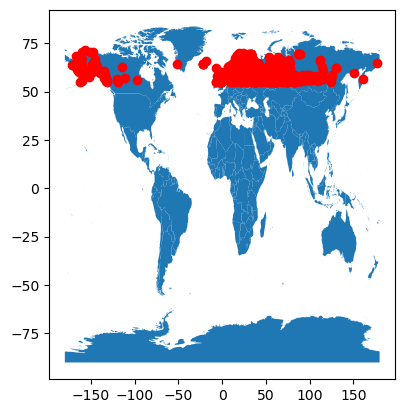

In [41]:
fig, ax = plt.subplots()
countries.plot(ax = ax)
communities.plot(ax = ax, color = 'red')
plt.show()

## Arctic Communities by Country 


In [42]:
# Number of Arctic communities by country 

n_comms = (communities.groupby('country')
           .size()
           .reset_index(name = 'n_communities'))

n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


## if-else statements 

our goal is to merge n_comms per country with countries geometries to merge them, we want them to have at least one column in common 

In [43]:
# Transform countries to set object 
set(countries.columns).intersection(n_comms.columns)


set()

In [44]:
common_columns = set(countries.columns).intersection(n_comms.columns)

# Check if any common columns 

if len(common_columns) != 0:
    print(f"Common columns {common_columns}")
else: 
    print(f"No columns in common.")

No columns in common.


## Check in 

Wrap up the previous code into a function called check_common_columns that prints a message depending on whether two general dataframes have column names in general.

In [45]:
# New variabes: df1, df2

def common_columns(df1, df2):
    """
    Prints a message depending if df1 and df2 have columns in common.
    """
    common_columns = set(df1.columns).intersection(df2.columns)

    # Check if any common columns 

    if len(common_columns) != 0:
        print(f"Common columns {common_columns}")
    else: 
        print(f"No columns in common.")

In [46]:
common_columns(countries, communities)

Common columns {'geometry'}


## Merge dataframes 

We want to: 
1. Use the country names data frame to add the country names to the ncomms data.
2. Merge the resulting data frame with country names.

To merge dataframes, we can use pandas merge `pandas.merge()` function: 

```python 
output_df = pd.merge(left_df,               # df on left side 
                    right_df,               # df on right side 
                    how = type_of_join,     # type of join, default = "inner"
                    on = column_to_join)    # Which column to join on 
```

In [47]:
n_comms = pd.merge(n_comms, 
                   country_names, 
                   how = 'left',
                   on = 'country')

In [48]:
n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [49]:
common_columns(n_comms, countries)

Common columns {'admin'}


## Check in 

Create a new variable called arctic countries which is a result of an inner join between countries and n comms 

In [50]:
common_columns(n_comms, countries)

Common columns {'admin'}


In [51]:
arctic_countries = pd.merge(countries, 
                   n_comms, 
                   how = 'inner',
                   on = 'admin')

In [52]:
arctic_countries

,admin,type,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


Notice we lost the Aland Islands. Let's double check it. 

In [53]:
# Update Index : 

arctic_countries = arctic_countries.set_index('admin')
arctic_countries.head()

,type,geometry,country,n_communities
admin,,,,
United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48


In [54]:
# Check Aland Islands is nowhere in dataframe 

'Aland Islands' in arctic_countries.values

False

In [55]:
arctic_countries.at['Finland', 'n_communities'] += 1

## Choropleth map 

To make the map we want, we need to specify the column parameter in plot() and make it equal to the column with the values we want to plot in each country. 

<Axes: >

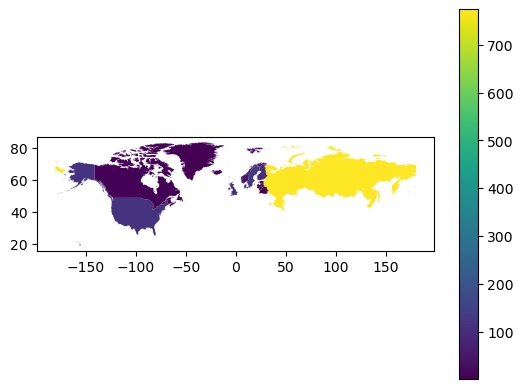

In [56]:
arctic_countries.plot(column = 'n_communities', 
                                legend = True)




## Reprojecting 

`to_crs` method for `geopandas.GeoDataFrame`s

```python 

updated_geodf = geodf.to_crs(new_crs)
```

new_crs is the crs that we want to convert to, this is an object of type CRS or a string representing the CRS 

In [57]:
# Reproject to CRS optimized for Arctic region
arctic_countries = arctic_countries.to_crs('epsg:3413')

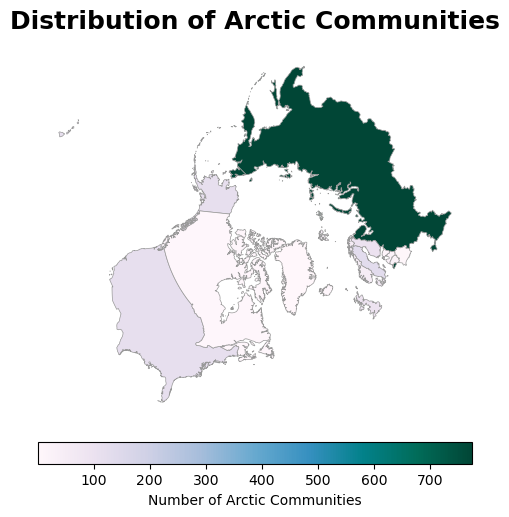

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()